This is reference sheet containing the function definitions and their example usage, the functions you'll encounter in CSE423 Lab. You can always search Google by function name to know more (It's better).

The functions that looks like `gl________()` are core **OpenGL** functions. These are concerned with drawing shapes and coloring.

The functions that looks like `glut________()` are **OpenGL Utility Toolkit** functions. These are concerned with window creation and management, input handling, animation control etc.

⚠️ This Colab file isn't for running. This just to note down function definition in an orderly manner, rather than using Google Docs. You'll be coding in PyCharm or VSCode or any other IDE, not Colab.

# `glutInit()`

Initializes the GLUT system mechanism. Should be called before calling any glut or gl functions.

In [ ]:
glutInit()

NameError: name 'glutInit' is not defined

# `glutInitDisplayMode(modes)`

Provides some characteristics that'll be applied to the windows which will be created. These characteristics can be selecting color mode (RGB with or without opacity), enabling depth buffer (used for 3D), enable multisampling etc. the characteristics are bitwise predfined constants. To enable multiple of those characteristics, just combine them using bitwise or operation before passing the result as parameter.

Ref: https://www.opengl.org/resources/libraries/glut/spec3/node12.html

In [ ]:
glutInitDisplayMode(GLUT_DEPTH | GLUT_DOUBLE | GLUT_RGBA | GLUT_MULTISAMPLE) # enable depth buffer, double buffering, RGB color, and multisampling

# OR

glutInitDisplayMode(GLUT_RGBA) # just enable and RGB color

# `glutInitWindowPosition(x, y)`

Set where on your screen the window will appear when it is first created. The x and y are coordinate values. Please note that your screen's origin is at the top-left corner and the positive x direction is rightwards, while positive y direction is downwards.

In [ ]:
glutInitWindowPosition(20, 40)

# `glutInitWindowSize(width, height)`

Sets the width and height of the window you're going to create

In [ ]:
glutInitWindowSize(640, 360) # create a 640 pixels wide and 360 pixels tall window

# `glutCreateWindow(window_name)`

Call this to create your application window. It takes a single paramter which is the name or title of the window. The parameter should be a python bstring. The function returns a refrence to the window which can be saved to a variable for future usage (optional).

In [ ]:
glutCreateWindow(b"My Application")

# `glutMainLoop()`

Start running your application's "main loop". The main loop is an internal infinte loop that is hidden from you, but it keeps the application running. It is responsible for "rendering new frames", capturing input events from keyboard/mouse and calling appropriate handler functions etc. When the loop breaks, the application terminates. Call this function at the last of your code.

In [ ]:
glutMainLoop()

# `glMatrixMode(mode)`

Tell OpenGL which matrix will be affcted by your subsequent matrix related operations from now on. This sets the active matrix which is internal to OpenGL. There are 4 matrices avaialble to you: modelview, projection, texture, and color. The mode will thus be any of the four constants: `GL_MODELVIEW`, `GL_PROJECTION`, `GL_TEXTURE`, `GL_COLOR`.

In [ ]:
glMatrixMode(GL_MODELVIEW) # Now er're going to manipulate the internal modelview matrix, meaning the currently active matrix is the modelview matrix.
# You can now call functions that can update the matrix values like glLoadIdentity() or glLoadMatrixf() or glOrtho() etc. depending on your need.

# `glLoadIdentity()`

Assign identity matrix values the currently activated matrix (activated by calling `glMatrixMode(...)`)

*👉 "Calling this function updates current matrix's values"*

In [ ]:
glLoadIdentity()

# `glOrtho(xMin, xMax, yMin, yMax, zMin, zMax)`

Used for setting up parallel (orthograpic) projection.

Mainly in your lab (which is 2D) you'll be using this function to set your drawing ranges (the extent of your digital graph paper AKA window).

The zMin (near), zMax (zMax) are for 3D drawing. Since the current labs are 2D, you can set them to 0 and 1 respectively.

We are mostly concerened with the first 4 parameters.

*👉 "Calling this function updates current matrix's values"*

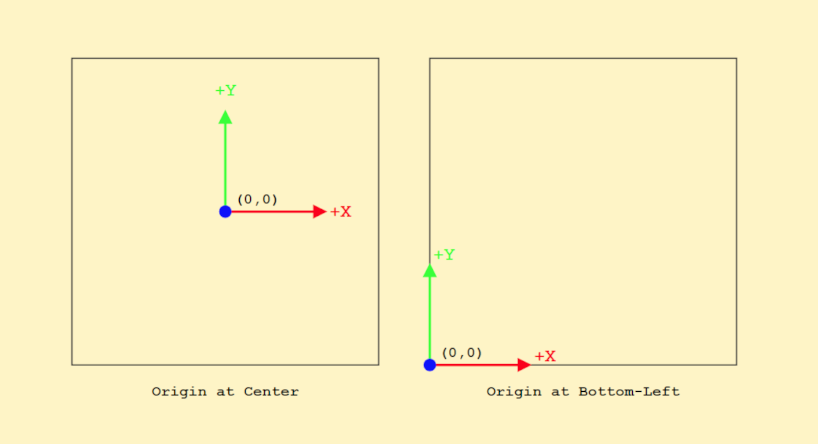

In [ ]:
glOrtho(-250, 250, -100, 100, 0, 1) # For a 500x200 window
# Our graph paper's ranges are from -250 to 250 in the x-axis, and -100 to 100 on the y-axis
# The origin (0, 0) point will be at the center of the window.

# OR

glOrtho(0, 500, 0, 200, 0, 1) # For a 500x200 window
# Our graph paper's ranges are from 0 to 500 in the x-axis, and 0 to 200 on the y-axis
# The origin (0, 0) point will be at the bottom-left corner of the window.
# Points drawn with a negative coordinate won't appear on the window for this particular one. Guess why.

# `gluLookAt(eyeX, eyeY, eyeZ, centerX, centerY, centerZ, upX, upY, upZ)`

Specifies the camera's 3D position position, where the camera is looking at (also a 3D point), and the (3D) up vector of the camera.

*👉 "Calling this function updates current matrix's values"*

For a generic 2D only application, you can just use the below code:

In [ ]:
gluLookAt(0,0,200, 0,0,0, 0,1,0)

# `gluPerspective(fovy, aspect, zNear, zFar)`

Set the camera field-of-view and aspect ratio.

*👉 "Calling this function updates current matrix's values"*

In [ ]:
gluPerspective(100,	1, 1, 100)

# `glViewport(x, y, width, height)`

Set the viewport rectangle's size and position.
For an ideal and straightforward application,
set the x, y values to 0, 0 respectively,
set width, height to your window's width and height respectively

In [ ]:
glViewport(0, 0, 640, 360) # assuming your window's size is 640x360, try to pass windows size global variables instead of absolute values like here.

# `glBegin(drawing_mode)`

Tell OpenGL to start drawing, it starts a "draw scope". The `drawing_mode` parameter species what shape we're going to draw (points, lines, triangles, quadrilaterals).

| What to draw | mode | Vertices will be treated as |
| --- | --- | --- |
| Points | `GL_POINTS` | singles |
| Lines | `GL_LINES` | pairs |
| Triangles | `GL_TRIANGLES` | triplets |
| Quadrilaterals | `GL_QUADS` | quadruplets |

A draw scope can be closed by calling `glEnd()`



In [ ]:
glBegin(GL_LINES) # Let's start drawing lines!

# `glVertex2f(x, y)`

Set a vertex/point as a part of forming a shape. (Plural of vertex = vertices)

A vertex is just a point that act as a corner of a shape.
For example, a line has 2 vertices, a triangle has 3, a quadrilaterals has 4 etc.

⏭ This function must be called **inside** a draw scope

This function takes x, y values which indicates the 3D coordinates of the vertex.

This particular function is for floating point parameters. Other versions exist, like `glVertex2d(x, y)` for double data type, `glVertex2i(x, y)` for integers etc.

It has "2" in the name because it takes 2 parameters (used for 2D).
3D and 4D versions are also available with their own respective data-type varities.

In [ ]:
glVertex2f(100, 200) # Place the 1st vertex
glVertex2f(300, 400) # Place the 2nd vertex

# `glColor3f(r, g, b)`

Sets an RGB color for the future vertices to use.
If you call this function with an RGB value, all the vertices plot next by calling `glVertex2f(x, y)` will be painted using the color you specifed, until you call `glColor3f(r, g, b)` again with a different RGB color value. The color state is internally saved.

Please note that the each of the r, g, b values have a floating point range of `[0-1]`, and not `[0-255]`.

This function can be called inside or outside a draw scope.

**Tip:** *You can create smooth gradient effect while drawing lines/triangles/quads by painting each vertex with a different color.*

In [ ]:
glColor3f(1, 0, 1) # Set future vertices to have purple color (purple's RGB value is (1, 0, 1))

# `glEnd()`

End a drawing scope. Every drawing scope that was started with a `glBegin(draw_mode)` call must be terminate by calling this function.

In [ ]:
glEnd()

# `glPointSize(size)`

Specifies how big a point will be drawn. After calling this, you can start drawing by calling `glBegin(GL_POINTS)`.

🛑 This function must be called **outside** a draw scope

In [ ]:
glPointSize(5) # the points drawn will be 5 pixels wide

# `glLineWidth(width)`

Specifies how thick a line will be drawn. After calling this, you can start drawing by calling `glBegin(GL_LINES)`.

🛑 This function must be called **outside** a draw scope

In [ ]:
glLineWidth(4) # the lines that'll be drawn will be 4 pixels thick/wide

# `glClearColor(r, g, b, a)`

Saves the RGBA color that'll be used when clearing the screen.

The A in RGBA stands for alpha (or opacity), controls the transparency.

⏭ Please note that calling this function only saves the color value, but won't actually clear the screen/window. That's a job for `glClear()` function.

In [ ]:
glClearColor(1, 0, 0, 1) # Save the color red, next when glClear() is called, the screen will be fully painted red.

# `glClear(aspects)`

Refreshes/Clears the screen/window with the saved color. Does the actual clearing. Paints the full window with the prespecified RGBA value.

The aspects parameter determines which output buffer(s) to clear. Will it be both color and depth, or color only. Options can be combined with bitwise OR.

**Tip:** *Use a combination of `glClearColor()` and `glClear()` to update the background color.*

If you don't clear, especially while doing animation, your previous frame's contents will still be there when you draw the current frame.

In [ ]:
glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT) # clear both the color buffer and depth buffer (used usually for 3D)

# OR

glClear(GL_COLOR_BUFFER_BIT) # clear only the color buffer (used usually for 2D)

# **Callback Functions**

In the context of this lab, callback functions are custom functions that you, the programmer, can write. But you won't be calling them.

Instead you register these functions by **passing their reference** as a parameter to some designated glut functions. Glut will itself call thse functions when appropriate, and might pass parameters to them.

`glutKeyboardFunc()`, `glutSpecialFunc()`, `glutMouseFunc()`, `glutIdleFunc()`, `glutDisplayFunc()` are some of the notable functions who accept a custom callback function's reference as parameter.

Below is an example how a callback function is created is registered. Please note that this particular one is a fake example.

In [ ]:
# Define the callback function that'll be called when appropriate (called by GLUT, not you)
def myCustomCallbackFunc(param1, param2):
  # do whatever you want
  pass

# Register the callback (this is a fake registration)
registerCallback(myCustomCallbackFunc)

# Please note that while registering
registerCallback(myCustomCallbackFunc) # ✔️ Correct, it sends the reference of the callback for registering
registerCallback(myCustomCallbackFunc()) # ❌ Wrong, this basically calls the function and passes its return value as parameter, not the refrence

# `glutKeyboardFunc(keyboardCallbackFunc)`

Lets you register a callback function that'll be called when an alphanumeric key is pressed on the keyboard. These keys are the one that can be covered by the ASCII range (a-z, A-Z, 0-9, space, punctuation etc.).

When the keyboardCallbackFunc is being called by glut, glut will pass 3 parameters to it. These are:

| Parameter | Meaning |
| --- | --- |
| `key` | the character value of the key pressed, passed as python bstring |
| `x` | mouse pointer's x coordinate (unused here) |
| `y` | mouse pointer's y coordinate (unused here) |

In [ ]:
# define our handler callback function
def keyboardCallbackFunc(key, x, y):
  # key parameter's value can be b'A', b'a', b' ', b'5' etc.
  if key == b'M' or key == b'm':
    print("You've pressed M")
  elif key == b' ':
    print("You've pressed the spacebar")

# Now register the callback
glutKeyboardFunc(keyboardCallbackFunc)

# `glutSpecialFunc(specialCallbackFunc)`

Lets you register a callback function that'll be called when an non-alphanumeric key is pressed on the keyboard. These keys are the one that are outside the ASCII range (arrow keys, function keys, home key, insert key etc).

When the specialCallbackFunc is being called by glut, glut will pass 3 parameters to it. These are:

| Parameter | Meaning |
| --- | --- |
| `key` | the keycode of the key pressed, passed as constant (integer) |
| `x` | mouse pointer's x coordinate (unused here) |
| `y` | mouse pointer's y coordinate (unused here) |

In [ ]:
# define our handler callback function
def specialCallbackFunc(key, x, y):
  # key parameter's value can be GLUT_KEY_LEFT, GLUT_KEY_RIGHT, GLUT_KEY_UP, GLUT_KEY_DOWN, GLUT_KEY_F1 ... GLUT_KEY_F11
  if key == GLUT_KEY_F5:
    print("You've pressed F5 key")
  elif key == GLUT_KEY_RIGHT:
    print("You've pressed the right arrow key")

# Now register the callback
glutSpecialFunc(specialCallbackFunc)

# `glutMouseFunc(mouseCallbackFunc)`

Lets you register a callback function that'll be called when a button is pressed on the mouse (left, middle or right).

When the mouseCallbackFunc is being called by glut, glut will pass 4 parameters to it. These are:

| Parameter | Meaning |
| --- | --- |
| `button` | the code of the button pressed, passed as constant (integer) |
| `state` | Was the button hold or released, passed as constant (integer) |
| `x` | mouse pointer's x coordinate |
| `y` | mouse pointer's y coordinate |

When you click a button on your mouse, it'll generate two events. One when you hold down the button and another one when you release it. Thus the callback will be called twice in this regard. So it's advised to filter out the state and consider only one of them.

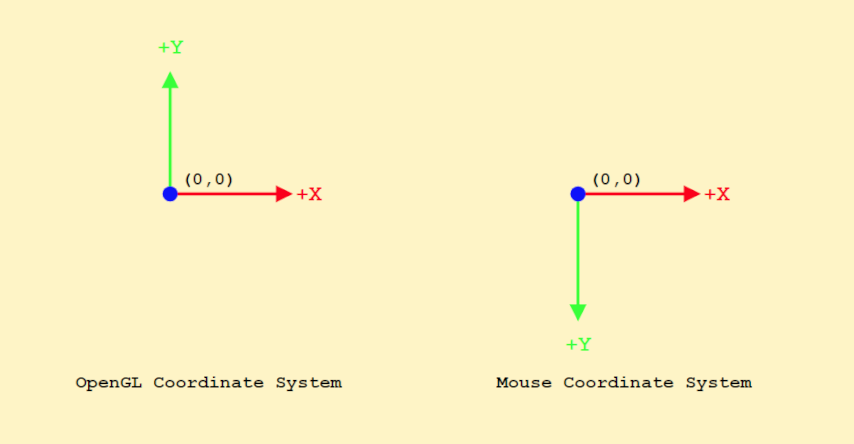

Another important thing to consider: The x, y coordinate values the get passed to the callback have a different coordinate system we are working with. To make clear, OpenGL coordinate system is like a graph paper (x-positive is rightwards, y-positive is upwards), but the mouse's coordinate system is (x-positive is rightwards, y-positive is downwards). So, it is very much needed to convert the passed coordinates to our intended coordinate system, which is by flipping the y-axis value.

In [ ]:
# If your origin is at the bottom-left corner of the window
def convert_coordinate(x, y):
    global winWidth, winHeight
    a = x
    b = winHeight - y
    return a, b

# OR

# If your origin is at the center of the window
def convert_coordinate(x, y):
    global winWidth, winHeight
    a = x - (winWidth / 2)
    b = (winHeight / 2) - y
    return a, b

# define our handler callback function
def mouseCallbackFunc(button, state, x, y):
  # button parameter's value can be any of GLUT_LEFT_BUTTON, GLUT_RIGHT_BUTTON, GLUT_MIDDLE_BUTTON
  # state parameter's value can be any of GLUT_DOWN, GLUT_UP

  # first, convert the coordinates
  x, y = convert_coordinate(x, y)

  # Now filter out and perform actions
  if button == GLUT_LEFT_BUTTON:
    if state == GLUT_DOWN:
      print("You just left clicked at:", (x, y))
  elif button == GLUT_RIGHT_BUTTON:
    if state == GLUT_DOWN:
      print("You just right clicked at:", (x, y))

# Now register the callback
glutMouseFunc(mouseCallbackFunc)

# `glutIdleFunc(idleCallbackFunc)`

Lets you register a callback function that will be called when the system is idle  (not rendering). No parameter is passed when the callback is called. Glut will call this function continously.

Place your animation logic code in the callback function's body. Animation logic means updating shape coordinates, or changing shape colors, or changing background color, or even toggling shape visibility. So, you might find the `idleCallbackFunc` is written as `animate` in some places.

🛑 **DO NOT place drawing logic here.**

At the end of the callback function's body, you must call `glutPostRedisplay()`, this tells glut to queue a new frame to render. If not called, no rendering will occur.

In [ ]:
def idleCallbackFunc():
  # update shape's position or size (change (x,y) coordinate values) [like below]
  global starX, starY
  starX += 4
  starY += 6

  # update shape's colors (change their (r,g,b) values)
  # update background color by setting RGBA values for glClearColor()
  # might as well toggle visibilty of shapes (boolean toggle)

  glutPostRedisplay()

glutIdleFunc(idleCallbackFunc)

# `glutDisplayFunc(displayCallbackFunc)`

Lets you register a callback function that will be called to draw stuffs on screen. No parameter is passed when the callback is called. Glut will call this function **ONLY IF** you have requested a new frame by calling `glutPostRedisplay()`.

Place your drawing logic code in the callback function's body. Drawing logic means drawing one or more shapes. This includes `glBegin()` to `glEnd()` and everything that can be called between. So, you might find the `displayCallbackFunc` is written as `display` in some places.

🛑 **DO NOT place animation logic here.**

At the end of the callback function's body, you must call `glutSwapBuffers()`, this tells glut to present what you have drawn till now to present on the screen.

In [ ]:
def displayCallbackFunc():
  glClearColor(0, 0, 0, 0) # set black background
  glClear(GL_COLOR_BUFFER_BIT) # clear with black background

  # draw a red line from (10, 10) to (200, 150)
  glColor3f(1, 0, 0)
  glBegin(GL_LINES)
  glVertex2f(10, 10)
  glVertex2f(200, 150)
  glEnd()

  glutSwapBuffers()

glutDisplayFunc(displayCallbackFunc)

NameError: name 'glutDisplayFunc' is not defined

# `glutPostRedisplay()`

Tells glut to queue a new frame to render. Must be called at the end of the idle callback function AKA animate. This will make glut call the display callback function.

In [ ]:
glutPostRedisplay()

# `glutSwapBuffers()`

Tells glut to present what you've drawn till now to the screen or window. Must be called at the end of your display callback function.

In [ ]:
glutSwapBuffers()